<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6105 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###CS6105_Lab_1.2

## Imports

In [1]:
# import libraries
from sklearn.linear_model import LogisticRegression
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

## Synthetic Dataset

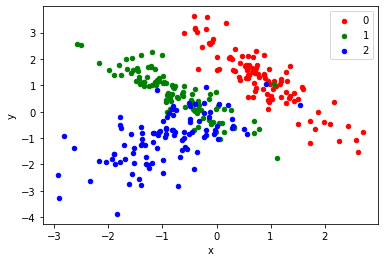

In [2]:
from sklearn.datasets import make_classification

# create synthetic data
# randomly generate a 2d, 3 classes dataset
# run several times the cell to observe the results

X1, y1 = make_classification(n_classes=3,
                            n_features=2,
                            n_samples=300, 
                            n_redundant=0, 
                            n_informative=2,
                            n_clusters_per_class=1)

# create a data frame
df = DataFrame(dict(x=X1[:,0], y=X1[:,1], label=y1))
# three classes
colors = {0:'red', 1:'green', 2:'blue'}
# figure
fig, ax = plt.subplots()
grouped = df.groupby('label')
# scatter plot
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# show the plot
plt.show()

In [3]:
# show first n rows (default 5)
df.head()

,x,y,label
0,-0.395541,0.867995,1
1,-1.998934,1.587996,1
2,-0.578449,0.168917,1
3,-1.201092,2.274913,1
4,-0.014688,0.100337,1


In [4]:
# count the data elements for each class
df['label'].value_counts()

2    101
1    101
0     98
Name: label, dtype: int64

## Logistic Regresion

* [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. 
* In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). 




In [5]:
# Logistic Regression model
LR_model = LogisticRegression()
# fit to data a Logistic Regresion model
LR_model.fit(X1, y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Decision boundary from [Wikipedia](https://en.wikipedia.org/wiki/Decision_boundary): 

* A decision boundary is the region of a problem space in 
which the output label of a classifier is ambiguous.

* If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable.

* In a statistical-classification problem with two classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class.

* You can find a related information to this topic in this [publication](https://towardsdatascience.com/classification-problems-and-exploring-decision-boundaries-3317e03afcdb)




/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


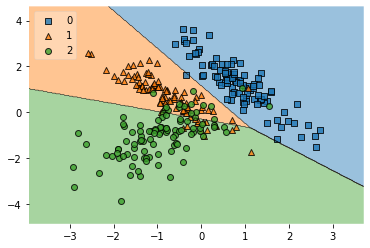

In [6]:
# Plotting the decision boundary 
# from the LogisticRegression model
plot_decision_regions(X1, y1, clf=LR_model, legend=2)


## New Data

In [7]:
# new data instances (10)
X_new, _ = make_classification(n_classes=3,
                            n_features=2,
                            n_samples=10, 
                            n_redundant=0, 
                            n_informative=2,
                            n_clusters_per_class=1)

## Predictions

In [8]:
# make predictions (assign class labels)
y_pred = LR_model.predict(X_new)
# show the inputs and predicted outputs
for i in range(len(X_new)):
	#print("X=%s, Class Predicted = %s" % (X_new[i], y_pred[i]))
  print("X{0} = {1}, Class Predicted = {2}".format(i, X_new[i], y_pred[i]))

X0 = [-1.07438085  0.97719668], Class Predicted = 1
X1 = [0.4747606  0.97091998], Class Predicted = 0
X2 = [-0.91595034  0.90632326], Class Predicted = 1
X3 = [0.21605186 2.26506006], Class Predicted = 0
X4 = [-0.91432343  0.60301393], Class Predicted = 1
X5 = [-1.21057787  1.3095796 ], Class Predicted = 1
X6 = [ 0.23528601 -1.42565581], Class Predicted = 2
X7 = [ 0.23666369 -1.72045644], Class Predicted = 2
X8 = [ 0.10759935 -0.37575322], Class Predicted = 2
X9 = [1.16607048 0.73083518], Class Predicted = 0


In [9]:
# create a data frame
df_new = DataFrame(dict(x=X_new[:,0], y=X_new[:,1], label=y_pred))

In [10]:
# show 10 rows 
df_new.head(10)

,x,y,label
0,-1.074381,0.977197,1
1,0.474761,0.970920,0
2,-0.915950,0.906323,1
3,0.216052,2.265060,0
4,-0.914323,0.603014,1
5,-1.210578,1.309580,1
6,0.235286,-1.425656,2
7,0.236664,-1.720456,2
8,0.107599,-0.375753,2
9,1.166070,0.730835,0


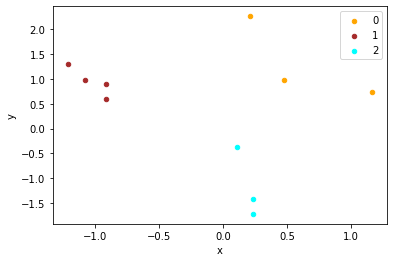

In [11]:
# three classes
colors2 = {0:'orange', 1:'brown', 2:'cyan'}
# figure
fig2, ax2 = plt.subplots()
# new data
grouped2 = df_new.groupby('label')
# scatter plot
for key2, group2 in grouped2:
    group2.plot(ax=ax2, kind='scatter', x='x', y='y', label=key2, color=colors2[key2])
# show the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


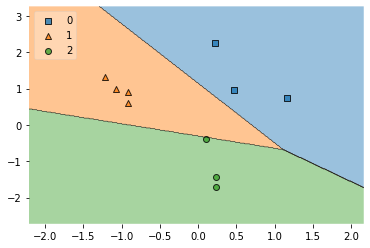

In [12]:
# Plotting the new decision boundary 
# from the LogisticRegression model
plot_decision_regions(X_new, y_pred, clf=LR_model, legend=2)